# Dataset: Song Lyrics
## Columns: Artist, Song, Link(from http://www.lyricsfreak.com), Text

### A Few (but not all) of the Questions of Interest:
What is the sentiment of each song? What is each artist's average sentiment?
What are the most common song topics (most used words)?
Which artist is the happiest/most unhappy?
What artists use the most complex language? Who uses the simplest?
Is there a correlation between language complexity and sentiment?
What artist created the most songs?
What song has the most words?
What percentage of the songs have featured artists?

In [1]:
%matplotlib inline

from wordcloud import *
import math
from nltk import tokenize
from nltk.corpus import stopwords
from collections import Counter
import random
import string
import re
import os
import numpy
from scipy.misc import imread
import textblob
import pandas as pd
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import plotly as py
import psycopg2
import seaborn as sbn
import requests
import textatistic
from bs4 import BeautifulSoup
matplotlib.style.use('ggplot')
py.offline.init_notebook_mode()

In [2]:
songs = pd.read_csv('/home/students/parsna01/DS320/songdata.csv')

In [3]:
songs

artist                                      song  \
0              ABBA                     Ahe's My Kind Of Girl   
1              ABBA                          Andante, Andante   
2              ABBA                            As Good As New   
3              ABBA                                      Bang   
4              ABBA                          Bang-A-Boomerang   
5              ABBA                        Burning My Bridges   
6              ABBA                                 Cassandra   
7              ABBA                                Chiquitita   
8              ABBA                               Crazy World   
9              ABBA                           Crying Over You   
10             ABBA                                     Dance   
11             ABBA                             Dancing Queen   
12             ABBA                               Disillusion   
13             ABBA                     Does Your Mother Know   
14             ABBA                               Dream World   
15             ABBA                            Dum Dum Diddle   
16             ABBA                                     Eagle   
17             ABBA                            Every Good Man   
18             ABBA                                  Fernando   
19             ABBA                     Fernando (In Spanish)   
20             ABBA                      Free As A Bumble Bee   
21             ABBA  From A Twinkling Star To A Passing Angel   
22             ABBA                         Gimme Gimme Gimme   
23             ABBA                  Givin' A Little Bit More   
24             ABBA                Gonna Sing You My Lovesong   
25             ABBA                                Hamlet III   
26             ABBA                              Happy Hawaii   
27             ABBA                            Happy New Year   
28             ABBA                        He Is Your Brother   
29             ABBA                           Head Over Heels   
...             ...                                       ...   
57620     Zebrahead                                  Big Shot   
57621     Zebrahead                                      Blur   
57622     Zebrahead                             Feel This Way   
57623     Zebrahead                                        Go   
57624     Zebrahead                                      Hate   
57625     Zebrahead                                Hell Yeah!   
57626     Zebrahead                            Hello Tomorrow   
57627     Zebrahead                             Here's To You   
57628     Zebrahead                            Hit The Ground   
57629     Zebrahead                      House Is Not My Home   
57630     Zebrahead                                    Ignite   
57631     Zebrahead                                 I'm Money   
57632     Zebrahead                                In My Room   
57633     Zebrahead                              Just The Tip   
57634     Zebrahead                               Let It Ride   
57635     Zebrahead                                 Let Me Go   
57636     Zebrahead                        Livin' Libido Loco   
57637     Zebrahead                      Lobotomy For Dummies   
57638     Zebrahead                             Mental Health   
57639     Zebrahead                               The Real Me   
57640     Zebrahead                                 The Setup   
57641  Ziggy Marley                              Freedom Road   
57642  Ziggy Marley                                    Friend   
57643  Ziggy Marley                                        G7   
57644  Ziggy Marley                                Generation   
57645  Ziggy Marley                             Good Old Days   
57646  Ziggy Marley                             Hand To Mouth   
57647          Zwan                              Come With Me   
57648          Zwan                                    Desire   
57649          Zwan                             

## Create a wordcloud showing the most used words (topics).

In [4]:
cleaned = songs.copy()

In [5]:
for i in range(len(cleaned.index)):
    char_list = list(cleaned.iloc[i].text)
    new_line = True
    while new_line:
        try:
            pos = char_list.index('\n')
            char_list[pos] = '.'
        except:
            new_line = False
    cleaned.iloc[i].text = ''.join(char_list)
    t = cleaned.iloc[i].text
    sep = re.findall(r'[\[\(][\w\s]*[:-]*[\w\s]*[\]\)]', t)
    sep = set(sep)
    for item in sep:
        lyr_list = t.split(item)
        t = ''.join(lyr_list)
    cleaned.iloc[i].text = t

In [6]:
sw = set(stopwords.words())
patt = re.compile(r"then|would|need|make|must|us|don't know|that|Cae|jt|I'm jt|jt can't|Cae I'm|know I'm")

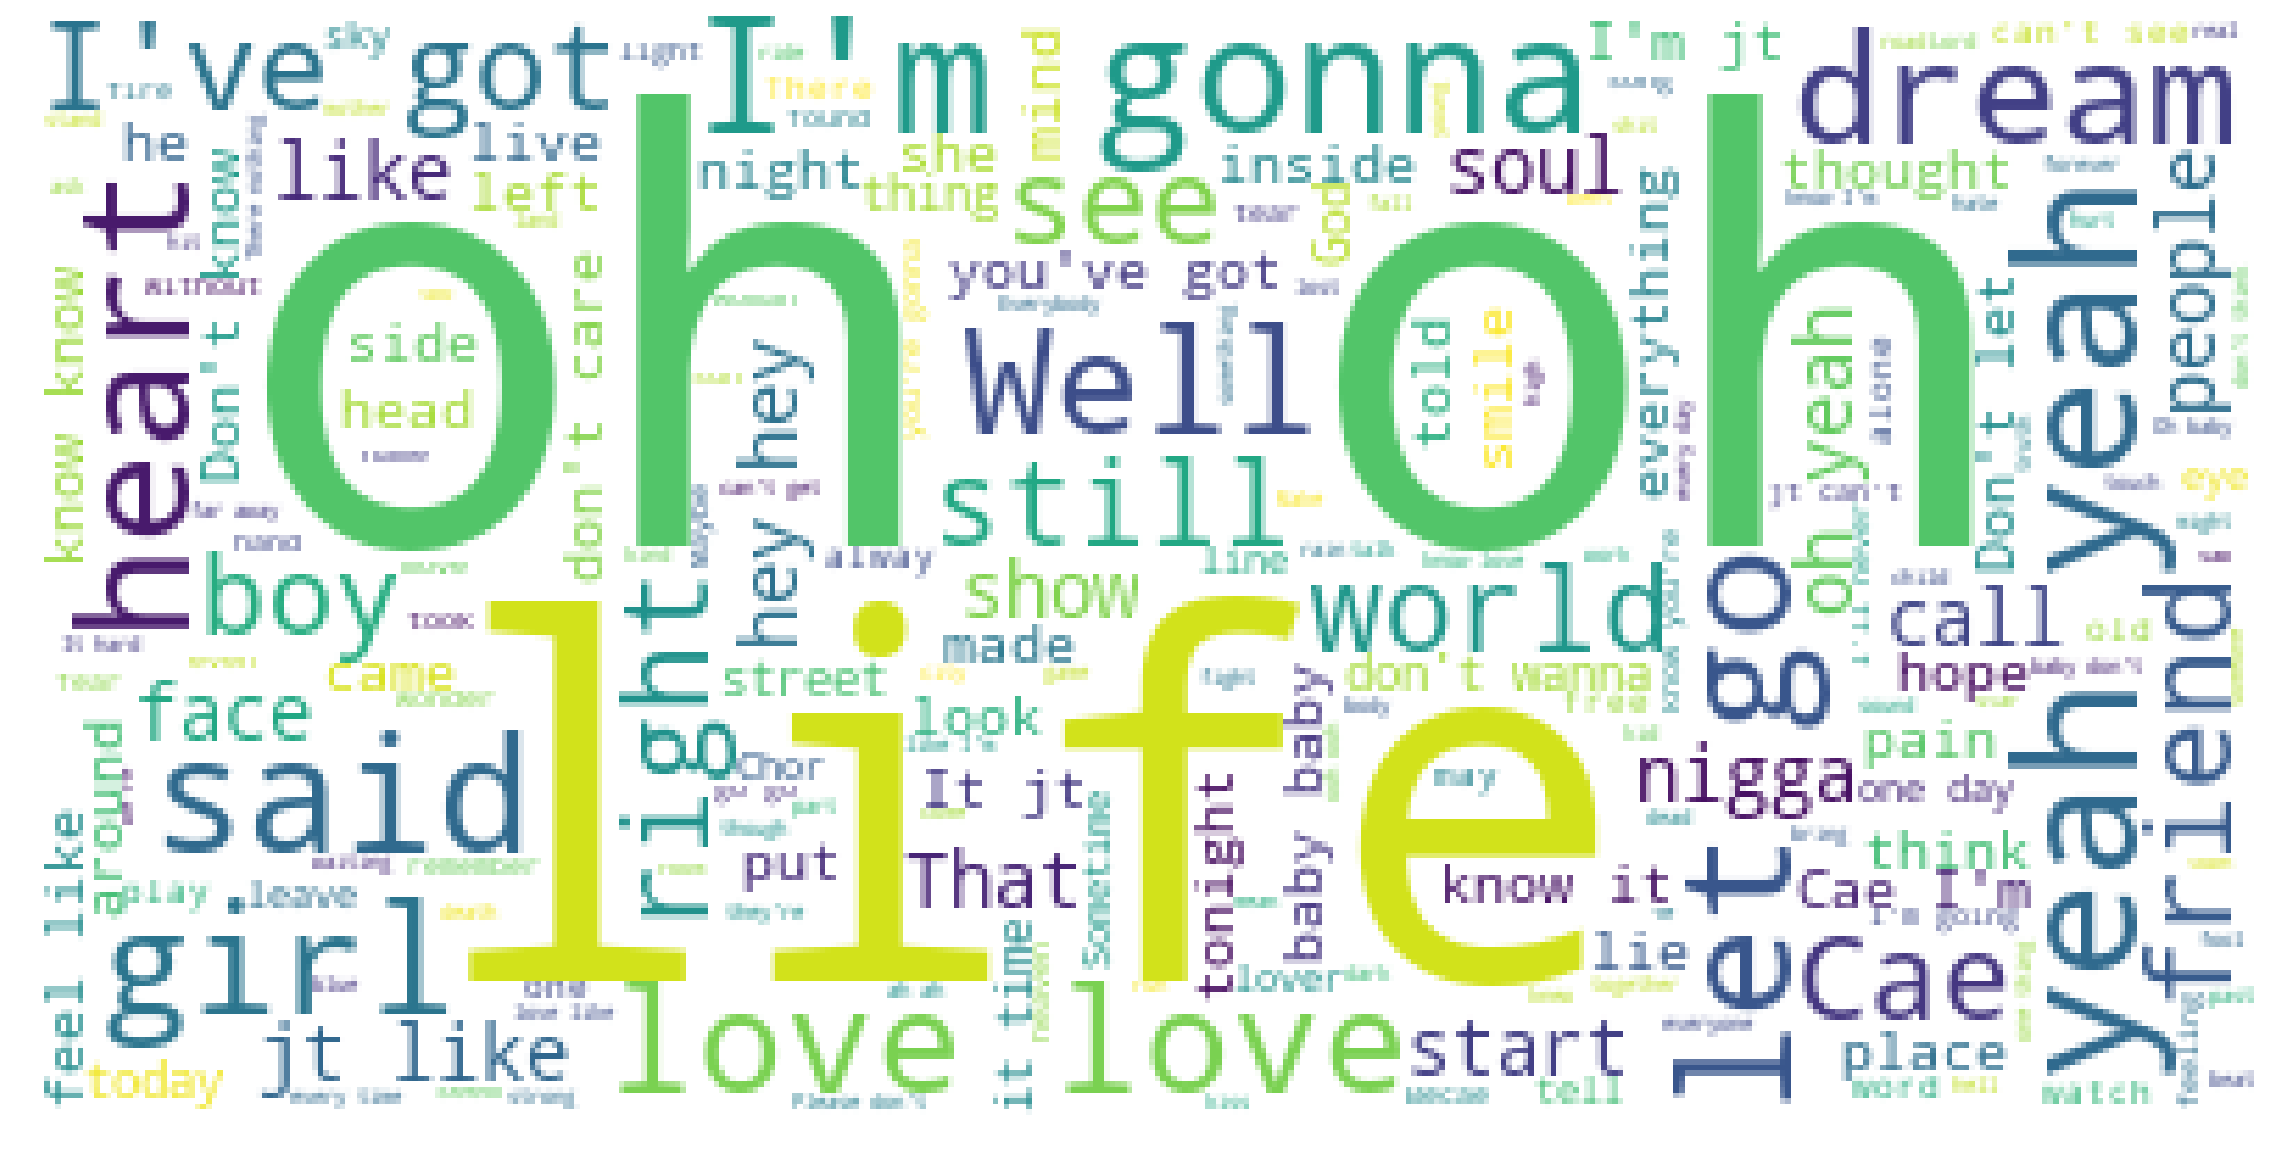

In [7]:
fig, ax = plt.subplots(figsize=(40, 25))
wcp = WordCloud(stopwords=sw, background_color='white').generate(re.sub(patt,'',' '.join(cleaned.text)))

ax.axis('off')
ax.imshow(wcp)

## What is the sentiment in each song?

In [10]:
def tb_score(text):
    res = textblob.TextBlob(text)
    return res.sentiment.polarity

In [11]:
cleaned['sentiment'] = cleaned.text.map(tb_score)

In [12]:
cleaned.head()

artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  sentiment  
0  Look at her face, it's a wonderful face  .And ...   0.447619  
1  Take it easy with me, please  .Touch me gently...   0.202222  
2  I'll never know why I had to go  .Why I had to...   0.300881  
3  Making somebody happy is a question of give an...   0.320588  
4  Making somebody happy is a question of give an...   0.320588

## What is the average sentiment for each artist?

In [13]:
cleaned.groupby('artist')['sentiment'].mean().sort_values(ascending=False)

artist
X-Treme                  0.491667
Independence Day         0.354834
Zed                      0.340000
Soundtracks              0.318891
Zoe                      0.308333
Iron Butterfly           0.303081
Hillsong                 0.278992
Religious Music          0.278768
Israel Houghton          0.260030
Israel                   0.260021
Beauty And The Beast     0.258460
Hillsong United          0.257170
Matt Redman              0.252310
Indiana Bible College    0.250962
Selah                    0.245315
Planetshakers            0.237393
Perry Como               0.236118
Andy Williams            0.234508
Doris Day                0.230084
Nat King Cole            0.230066
Luther Vandross          0.229625
Don Moen                 0.229068
Isley Brothers           0.228576
Gloria Gaynor            0.227899
Matt Monro               0.220863
Natalie Cole             0.220603
Dean Martin              0.220454
Kari Jobe                0.213354
Frankie Valli            0.212539
Frank S

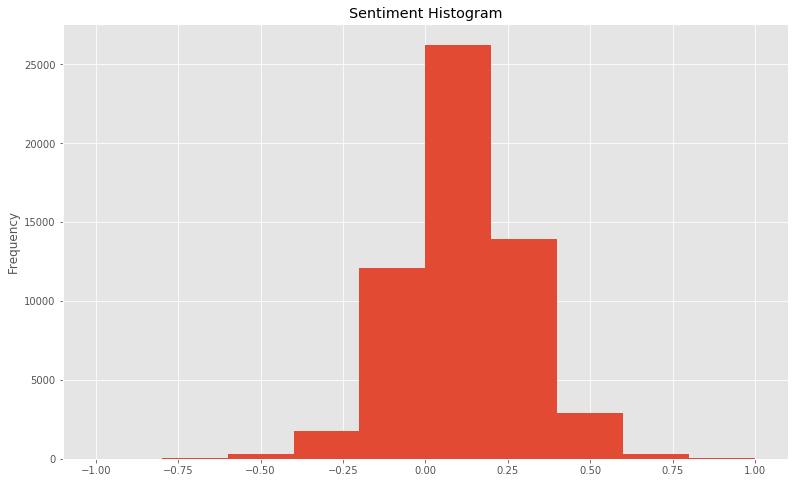

In [14]:
cleaned['sentiment'].plot.hist(figsize=(13,8), title='Sentiment Histogram')

## Who is the happiest/least happy?

In [15]:
happiest = cleaned.groupby('artist')['sentiment'].mean().sort_values(ascending=False).head(1)
unhappiest = cleaned.groupby('artist')['sentiment'].mean().sort_values().head(1)

In [16]:
happiest

artist
X-Treme    0.491667
Name: sentiment, dtype: float64

In [17]:
unhappiest

artist
Exo-K   -0.217336
Name: sentiment, dtype: float64

In [18]:
cleaned[cleaned.artist == 'X-Treme'].count()

artist       1
song         1
link         1
text         1
sentiment    1
dtype: int64

In [19]:
cleaned[cleaned.artist == 'Exo-K'].count()

artist       2
song         2
link         2
text         2
sentiment    2
dtype: int64

As you can see, both of these artists have extreme sentiment because, in part, they don't have very many songs...

So what artists that have at least 5 songs in the database are the most and least happy?

In [20]:
happiest = cleaned.groupby('artist').count()
h = happiest[happiest.song >= 5]
l = list(h.index)
happiest = cleaned.groupby('artist')['sentiment'].mean().sort_values(ascending=False)
for i in range(len(happiest.index)):
    if happiest.index[i] in l:
        big_happy = happiest.index[i]
        break
big_happy

'Independence Day'

In [21]:
unhappiest = cleaned.groupby('artist').count()
u = unhappiest[unhappiest.song >= 5]
li = list(u.index)
unhappiest = cleaned.groupby('artist')['sentiment'].mean().sort_values()
for i in range(len(unhappiest.index)):
    if unhappiest.index[i] in li:
        big_unhappy = unhappiest.index[i]
        break
big_unhappy

'Unseen'

## Who uses the most and least complex language?

We use a random sample of 7000 songs since it takes too long to run text complexity on entire data frame. For the remainder of the document, any time that language complexity is needed, this random sample will be used for the sake of running time.

In [22]:
sample = cleaned.sample(frac=1).reset_index()

In [23]:
sample = sample.head(7000)

In [24]:
sample['text_complexity'] = sample.text.map(lambda x : textatistic.fleschkincaid_score(x))

In [25]:
sample.groupby('artist')['text_complexity'].mean().sort_values(ascending=False)

artist
Exo                    4.014161
Exo-K                  2.740734
Dewa 19                2.060189
Iwan Fals              1.974064
Slayer                 1.933411
Andrea Bocelli         1.504005
Tom Lehrer             1.333126
GMB                    1.289750
The Broadways          1.284501
Z-Ro                   1.070877
Ariel Rivera           1.019987
Q-Tip                  0.904661
Koes Plus              0.903120
Fifth Harmony          0.864240
Venom                  0.803343
Zao                    0.794446
Enigma                 0.758529
Freddie Aguilar        0.736181
Youngbloodz            0.729010
Hank Snow              0.698470
Face To Face           0.689908
Migos                  0.676415
Selah                  0.673182
Rush                   0.663204
Dream Theater          0.656149
Raffi                  0.655933
Ultramagnetic Mc's     0.630323
Old 97's               0.600896
Men At Work            0.596941
Unseen                 0.576504
                         ...   
J

In [26]:
most_complex = sample.groupby('artist')['text_complexity'].mean().sort_values(ascending=False).head(1)
least_complex = sample.groupby('artist')['text_complexity'].mean().sort_values().head(1)

In [27]:
most_complex

artist
Exo    4.014161
Name: text_complexity, dtype: float64

In [28]:
least_complex

artist
Next To Normal   -1.8196
Name: text_complexity, dtype: float64

In [30]:
sample.head()

index                 artist                                        song  \
0  17056           Randy Travis                         Peace In The Valley   
1  44341            The Monkees                                  Mary, Mary   
2   8398  Indiana Bible College                         Thy Name Be Praised   
3  34081                   Glee  I Still Haven't Found What I'm Looking For   
4   5168  Engelbert Humperdinck                       Let Me Into Your Life   

                                                link  \
0  /r/randy+travis/peace+in+the+valley_20290086.html   
1                 /m/monkees/mary+mary_20095403.html   
2  /i/indiana+bible+college/thy+name+be+praised_2...   
3  /g/glee/i+still+havent+found+what+im+looking+f...   
4  /e/engelbert+humperdinck/let+me+into+your+life...   

                                                text  sentiment  \
0  Well, I'm tired and so weary  .But I must go a...   0.117521   
1  Mary, Mary, where you goin' to?  .Mary, Mary, ...   0.374838   
2  Verse 1  .Holy, holy, Holy is Thy name  .Wonde...   0.777778   
3  Sam:  .I have climbed highest mountains  .I ha...   0.029140   
4  Hurt you.  .How could anyone hurt you  .Leave ...   0.008761   

   text_complexity  
0        -0.916129  
1        -1.870115  
2        -0.183313  
3        -0.621704  
4        -0.831739

## Is there a correlation between text complexity and text sentiment?

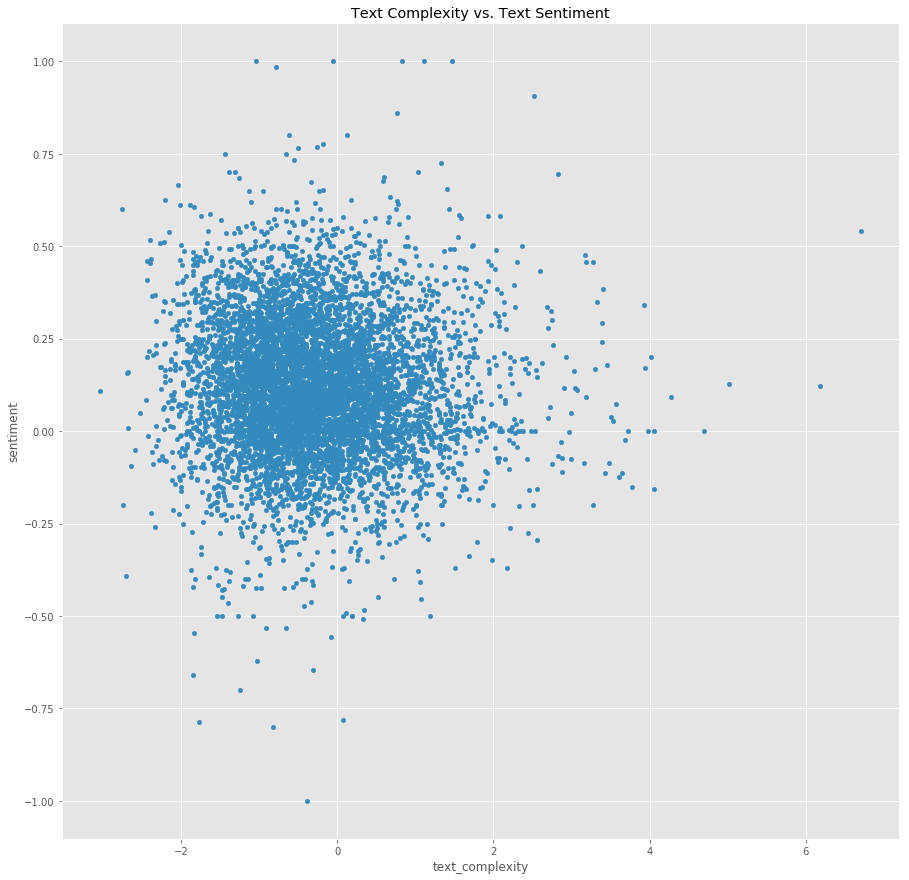

In [31]:
sample.sort_values(by='text_complexity').plot.scatter(x='text_complexity', y='sentiment',figsize=(15,15), title='Text Complexity vs. Text Sentiment')

In [32]:
numpy.corrcoef(sample['text_complexity'], sample['sentiment'])[0,1]

-0.042015278969018528

It appears as though there is a slight negative correlation between text complexity and text sentiment. In other words, the more complex, the less positive. However, this correlation coefficient is very close to 0. Thus, the correlation is not strong at all. This lack of correlation can be seen in the graph above.

## What artist created the most songs? Create a histogram of number of songs created per artist.

In [33]:
songs_created = cleaned.groupby('artist')['song'].count()
songs_created.sort_values(ascending=False).head(1)

artist
Donna Summer    191
Name: song, dtype: int64

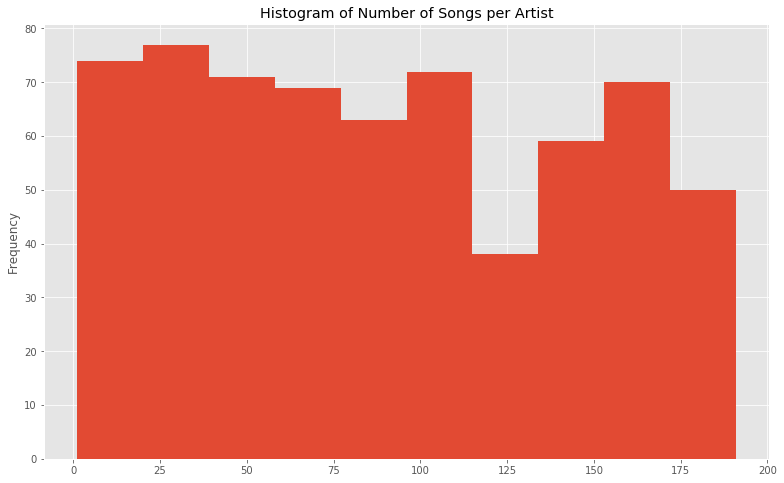

In [34]:
songs_created.plot.hist(figsize=(13,8), title='Histogram of Number of Songs per Artist')

## What song has the most words? Create a histogram of number of words per song.

In [35]:
def words(text):
    words = len(text.split(' '))
    return words

In [36]:
cleaned['Words'] = cleaned.text.map(words)

In [37]:
cleaned.sort_values(by='Words', ascending=False).head(1)

artist           song                                      link  \
41628  Lil Wayne  Did It Before  /l/lil+wayne/did+it+before_20437023.html   

                                                    text  sentiment  Words  
41628  Woo... Its Feel Good... Arite Yea... Carter 3....   0.182353    947

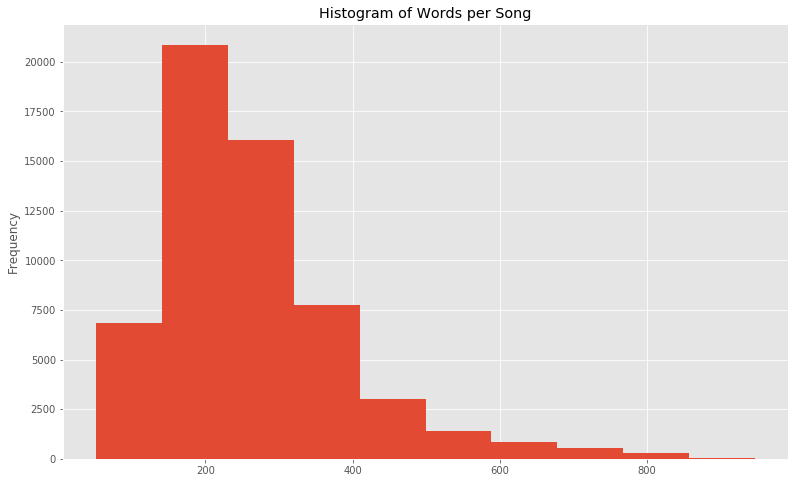

In [38]:
cleaned['Words'].plot.hist(figsize=(13,8), title='Histogram of Words per Song')

## Who has the most and least words per song?

In [39]:
cleaned.groupby('artist')['Words'].mean().sort_values(ascending=False).head()

artist
Young Dro      680.714286
Young Buck     671.764706
Youngbloodz    658.894737
Xzibit         637.191489
Z-Ro           629.500000
Name: Words, dtype: float64

In [40]:
cleaned.groupby('artist')['Words'].mean().sort_values().head()

artist
Ungu          91.500000
Koes Plus     98.900000
X-Treme      113.000000
GMB          121.461538
Quasi        132.640000
Name: Words, dtype: float64

## What artists have said the most words ever in song?

In [41]:
cleaned.groupby('artist')['Words'].sum().sort_values(ascending=False).head()

artist
Lil Wayne             71125
Insane Clown Posse    70846
LL Cool J             69148
R. Kelly              63556
Chris Brown           63427
Name: Words, dtype: int64

## Is there a correlation between words per song and the complexity of its lyrics?

In [42]:
sample['Words'] = sample.text.map(words)

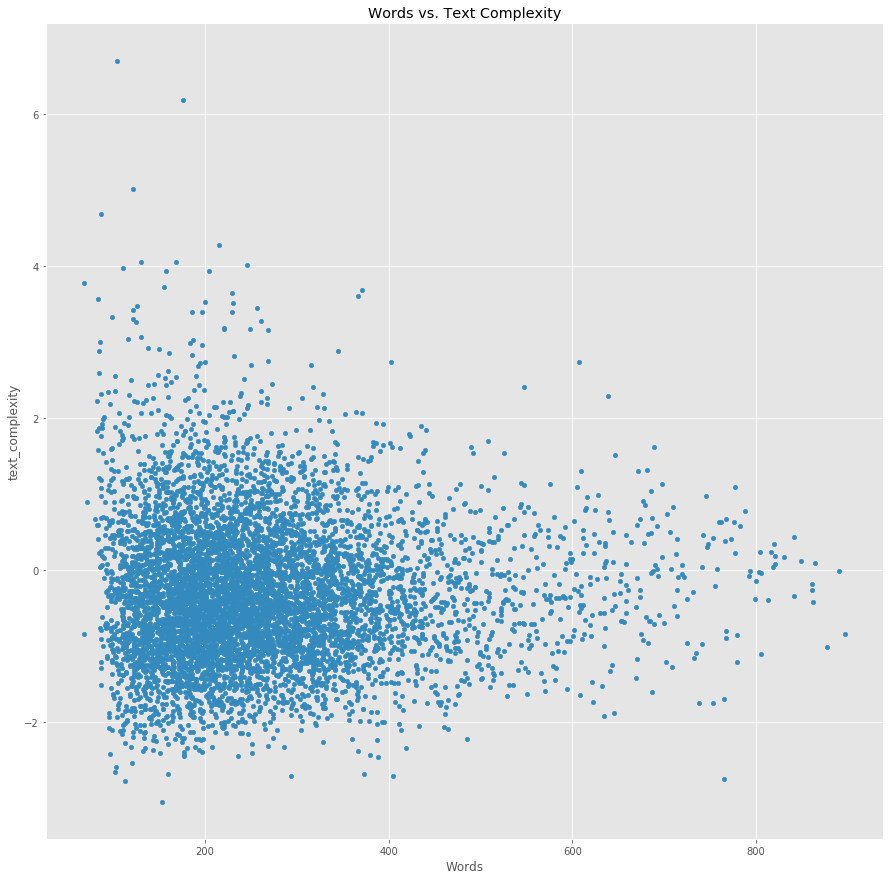

In [43]:
sample.plot.scatter(x='Words', y='text_complexity', figsize=(15,15), title='Words vs. Text Complexity')

In [44]:
numpy.corrcoef(sample['text_complexity'], sample['Words'])[0,1]

-0.0052123360434003013

Once again, we see that there is very little correlation at all between number of words used per song and and the complexity of that song's lyrics. The correlation coefficient is extremely small.

## What is the average number of words used per line in each song? What artists use the most words per bar? The least?

In [45]:
def words_per_line(text):
    n = 0
    line_sum = 0
    line_list = text.split('.')
    for line in line_list:
        word_n = 0
        if line != ' .' and line != '.' and line != ' ' and line != '..' and line != '' and line != '  ':
            words = line.split(' ')
            for word in words:
                if word != '' and word != ' ':
                    word_n += 1
            line_sum += word_n
            n += 1
    return round(line_sum/n, 2)
        

In [48]:
cleaned['Avg. Words per Line'] = cleaned.text.map(words_per_line)

In [49]:
cleaned.head()

artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  sentiment  Words  \
0  Look at her face, it's a wonderful face  .And ...   0.447619    174   
1  Take it easy with me, please  .Touch me gently...   0.202222    263   
2  I'll never know why I had to go  .Why I had to...   0.300881    354   
3  Making somebody happy is a question of give an...   0.320588    243   
4  Making somebody happy is a question of give an...   0.320588    241   

   Avg. Words per Line  
0                 9.56  
1                 5.00  
2                 9.45  
3                 5.88  
4                 5.82

In [50]:
cleaned.groupby('artist')['Avg. Words per Line'].mean().sort_values(ascending=False).head(5)

artist
Z-Ro             9.902222
Loretta Lynn     9.857166
Tom T. Hall      9.783687
George Formby    9.605294
Wanda Jackson    9.455310
Name: Avg. Words per Line, dtype: float64

In [51]:
cleaned.groupby('artist')['Avg. Words per Line'].mean().sort_values().head(5)

artist
U-Kiss       3.620000
Dewa 19      4.070952
Koes Plus    4.155000
Iwan Fals    4.167368
Zazie        4.230000
Name: Avg. Words per Line, dtype: float64

## Is there a correlation between words per line and text complexity?

In [46]:
sample['Avg. Words per Line'] = sample.text.map(words_per_line)

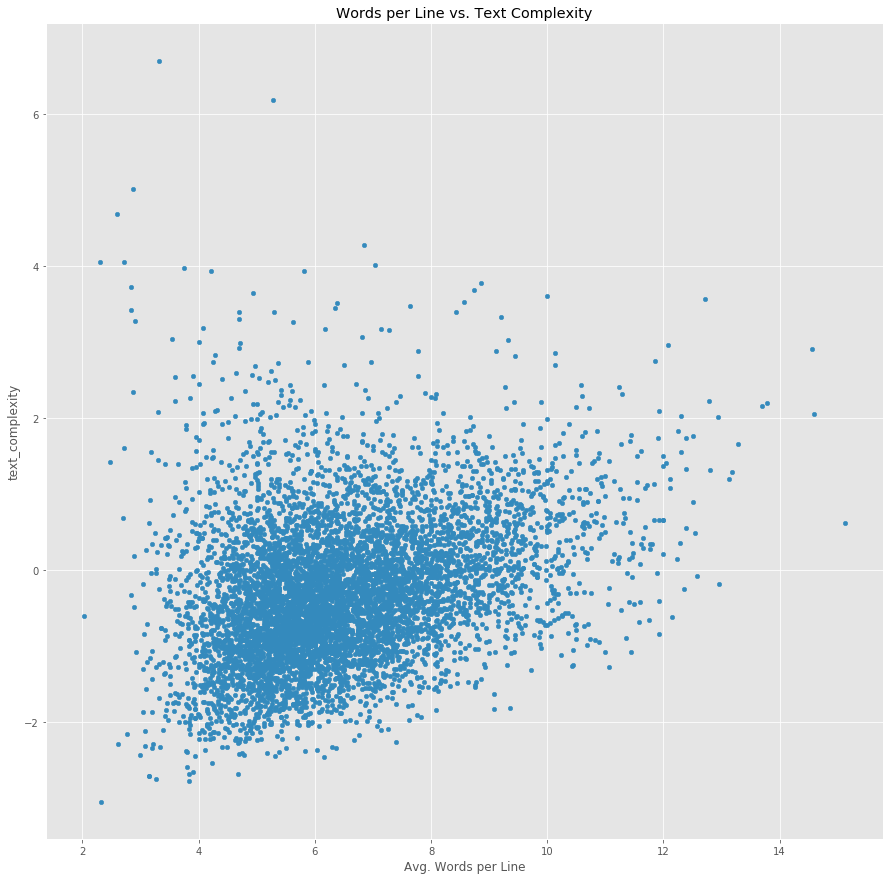

In [52]:
sample.plot.scatter(x='Avg. Words per Line', y='text_complexity', figsize=(15,15), title='Words per Line vs. Text Complexity')

In [53]:
numpy.corrcoef(sample['text_complexity'], sample['Avg. Words per Line'])[0,1]

0.32267619994043073

As can be seen from the value directly above and the scatterplot showing average words per line and text complexity, there is definitely a stronger correlation between the two than the previous measures. However, there still is quite a bit a variability seen in the graph and the correlation coefficient is still less than 0.4.

## What percentage of the songs have featured artists?

In [54]:
denom = 0
numer = 0
for i in range(len(cleaned.index)):
    denom += 1
    t = cleaned.iloc[i].text
    s = cleaned.iloc[i].song
    features = re.findall(r'[Ff]e*a*t.{0,2}\s*\w{0,20}\)', t)
    f = features + re.findall(r'[Ff]e*a*t.{0,2}\s*\w*', s)
    if f != []:
        numer += 1
        
print(str(round(numer/denom*100, 2)) + ' percent of songs have featured artists')

1.17 percent of songs have featured artists
